In [1]:
from model import TwoLayerConv
from dataset import CSVLoader, UnNormalize
from train import train_model
from eval import evaluate
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch

## User model, loss function, optimizer, and hyper-parameters

In [2]:
# Hyper-parameters
epochs     = 50
lr         = 0.001
batch_size = 32

# Model, Loss_fn, and Optimizer
model      = TwoLayerConv()
criterion  = torch.nn.CrossEntropyLoss()
optimizer  = torch.optim.Adam(params = model.parameters(), lr = lr)
device     = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## Load the data and create dataloaders

In [4]:
cifar_mu = [0.49139968, 0.48215827, 0.44653124]
cifar_sd = [0.24703233, 0.24348505, 0.26158768]

# tf = transforms.Compose([transforms.ToTensor(), transforms.Normalize(cifar_mu, cifar_sd)])

# Downloaded from pytorch
dataset = datasets.CIFAR10(root='data/', download = True, transform = None)
test_dataset = datasets.CIFAR10(root='data/', train = False, transform = None)




tf = transforms.Compose([transforms.ToTensor(),
                         transforms.Normalize(mean = cifar_mu, std = cifar_sd),
                         transforms.RandomHorizontalFlip()
                         ])

train_dataset = CSVLoader(train_csv, tf)
train_loader  = DataLoader(train_dataset, batch_size = batch_size, shuffle = True, num_workers = 4)

val_dataset   = CSVLoader(val_csv, tf)
val_loader    = DataLoader(val_dataset, batch_size = batch_size, shuffle = False, num_workers = 4)

test_dataset  = CSVLoader(test_csv, tf)
test_loader   = DataLoader(test_dataset, batch_size = batch_size, shuffle = False, num_workers = 4)

## Example Images

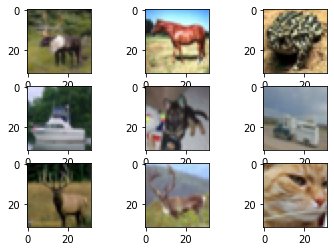

In [5]:
im_tr = transforms.Compose([UnNormalize(cifar_mu, cifar_sd),
                            transforms.ToPILImage()])

images = next(iter(train_loader))[0]
_, ax = plt.subplots(3, 3)

counter = 0
for i in range(3):
    for j in range(3):
        
        image = im_tr(images[counter])
        ax[i, j].imshow(image)
        counter += 1


    

## Tranining Begins!

In [6]:
model, losses, accuracies, val_losses, val_accuracies = train_model(model, epochs, train_loader,
 val_loader, optimizer, criterion, device, track_loss = True)

Epoch 1


100%|██████████| 935/935 [00:03<00:00, 271.51it/s]


Epoch 2


100%|██████████| 935/935 [00:03<00:00, 273.40it/s]


Epoch 3


100%|██████████| 935/935 [00:03<00:00, 287.71it/s]


Epoch 4


100%|██████████| 935/935 [00:03<00:00, 264.49it/s]


Epoch 5


100%|██████████| 935/935 [00:03<00:00, 265.27it/s]

Loss:  1038.959754049778 Accuracy:  0.60641426


Val Loss:  361.5989119410515 Val Accuracy:  0.59599763
Epoch 6


100%|██████████| 935/935 [00:03<00:00, 262.91it/s]


Epoch 7


100%|██████████| 935/935 [00:03<00:00, 268.43it/s]


Epoch 8


100%|██████████| 935/935 [00:03<00:00, 274.46it/s]


Epoch 9


100%|██████████| 935/935 [00:03<00:00, 256.52it/s]


Epoch 10


100%|██████████| 935/935 [00:03<00:00, 276.40it/s]

Loss:  872.0491577386856 Accuracy:  0.6733663


Val Loss:  331.22264271974564 Val Accuracy:  0.635427
Epoch 11


100%|██████████| 935/935 [00:03<00:00, 253.30it/s]


Epoch 12


100%|██████████| 935/935 [00:03<00:00, 276.80it/s]


Epoch 13


100%|██████████| 935/935 [00:03<00:00, 272.33it/s]


Epoch 14


100%|██████████| 935/935 [00:03<00:00, 259.11it/s]


Epoch 15


100%|██████████| 935/935 [00:03<00:00, 259.33it/s]

Loss:  779.1579481363297 Accuracy:  0.7054043


Val Loss:  322.6387270092964 Val Accuracy:  0.6532594
Epoch 16


100%|██████████| 935/935 [00:03<00:00, 261.83it/s]


Epoch 17


100%|██████████| 935/935 [00:03<00:00, 260.83it/s]


Epoch 18


100%|██████████| 935/935 [00:03<00:00, 263.67it/s]


Epoch 19


100%|██████████| 935/935 [00:03<00:00, 262.31it/s]


Epoch 20


100%|██████████| 935/935 [00:03<00:00, 252.77it/s]


Loss:  712.3859424293041 Accuracy:  0.73169017
Val Loss:  340.49322563409805 Val Accuracy:  0.64810777
Epoch 21


100%|██████████| 935/935 [00:03<00:00, 265.41it/s]


Epoch 22


100%|██████████| 935/935 [00:03<00:00, 243.57it/s]


Epoch 23


100%|██████████| 935/935 [00:03<00:00, 268.59it/s]


Epoch 24


100%|██████████| 935/935 [00:03<00:00, 252.10it/s]


Epoch 25


100%|██████████| 935/935 [00:03<00:00, 263.73it/s]

Loss:  663.4986699223518 Accuracy:  0.7451341


Val Loss:  339.98421800136566 Val Accuracy:  0.6417674
Epoch 26


100%|██████████| 935/935 [00:03<00:00, 258.04it/s]


Epoch 27


100%|██████████| 935/935 [00:03<00:00, 267.30it/s]


Epoch 28


100%|██████████| 935/935 [00:03<00:00, 278.13it/s]


Epoch 29


100%|██████████| 935/935 [00:03<00:00, 254.03it/s]


Epoch 30


100%|██████████| 935/935 [00:03<00:00, 270.50it/s]

Loss:  624.417100995779 Accuracy:  0.7642633


Val Loss:  360.16578537225723 Val Accuracy:  0.6458292
Epoch 31


100%|██████████| 935/935 [00:03<00:00, 265.34it/s]


Epoch 32


100%|██████████| 935/935 [00:03<00:00, 265.75it/s]


Epoch 33


100%|██████████| 935/935 [00:03<00:00, 269.69it/s]


Epoch 34


100%|██████████| 935/935 [00:03<00:00, 266.36it/s]


Epoch 35


100%|██████████| 935/935 [00:03<00:00, 262.04it/s]

Loss:  582.8869018852711 Accuracy:  0.7762357


Val Loss:  376.2253988981247 Val Accuracy:  0.6352289
Epoch 36


100%|██████████| 935/935 [00:03<00:00, 269.64it/s]


Epoch 37


100%|██████████| 935/935 [00:03<00:00, 268.88it/s]


Epoch 38


100%|██████████| 935/935 [00:03<00:00, 250.85it/s]


Epoch 39


100%|██████████| 935/935 [00:03<00:00, 265.17it/s]


Epoch 40


100%|██████████| 935/935 [00:03<00:00, 260.27it/s]

Loss:  557.8600554615259 Accuracy:  0.7865695


Val Loss:  392.56073290109634 Val Accuracy:  0.63681394
Epoch 41


100%|██████████| 935/935 [00:03<00:00, 261.58it/s]


Epoch 42


100%|██████████| 935/935 [00:03<00:00, 268.44it/s]


Epoch 43


100%|██████████| 935/935 [00:03<00:00, 269.59it/s]


Epoch 44


100%|██████████| 935/935 [00:03<00:00, 270.44it/s]


Epoch 45


100%|██████████| 935/935 [00:03<00:00, 271.00it/s]

Loss:  528.7386536598206 Accuracy:  0.8000468


Val Loss:  398.0654268860817 Val Accuracy:  0.6363186
Epoch 46


100%|██████████| 935/935 [00:03<00:00, 274.30it/s]


Epoch 47


100%|██████████| 935/935 [00:03<00:00, 256.71it/s]


Epoch 48


100%|██████████| 935/935 [00:03<00:00, 271.16it/s]


Epoch 49


100%|██████████| 935/935 [00:03<00:00, 249.21it/s]


Epoch 50


100%|██████████| 935/935 [00:03<00:00, 268.10it/s]

Loss:  507.2740496844053 Accuracy:  0.8056986


Val Loss:  421.00621151924133 Val Accuracy:  0.62789774


## Evalute Model on Test Set

In [7]:
loss, accuracy = evaluate(model, test_loader, criterion, device)
accuracy * 100

63.21471333503723

## Plot Accuracies and Losses

Text(0.5, 1.0, 'Accuracies')

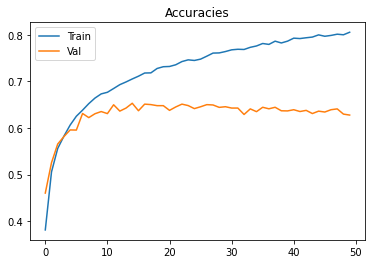

In [8]:
plt.plot(accuracies, label = 'Train')
plt.legend()
plt.plot(val_accuracies, label = 'Val')
plt.legend()
plt.title('Accuracies')

Text(0.5, 1.0, 'Losses')

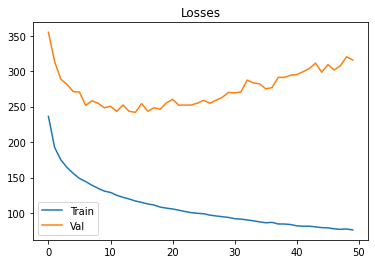

In [9]:
plt.plot([loss * .15 for loss in losses], label = 'Train')
plt.legend()
plt.plot([val_loss * .75 for val_loss in val_losses], label = 'Val')
plt.legend()
plt.title('Losses')